# Задание

У каждого есть свой набор данный, который можно найти в ведомости на вкладке "Линейная регрессия":

https://clck.ru/32BVWe

Скачиваете свой датасет с kaggle (для этого нужно авторизоваться с гугл аккаунт и скачать датасет).

**Ваша задача:**
1. Исследовать данные
2. Создать тренировочную и тестовую подвыборки
3. Построить модель линейной регрессии по своему набору данных (т.е. создать модель и обучить ее на тренировочной выборке)
4. Получить коэффиценты уравнения линейной регрессии
5. Написать уравнение линейной регрессии
6. Визуализировать данные и полученное уравнение линейной регрессии
7. Оценивать полученную модель с помощью MSE, MAE, R2.
8. Сделать письменный вывод получившихся результатов (хорошая или плохая получлась оценка MSE и почему), привести восстановленное линейное уравнение регрессии, сделать вывод какие из признаков оказались наиболее значимыми, какие нет и почему.

#1) Исследовать данные

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
from collections import Counter 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score 
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [10]:
df = pd.read_csv('train.csv')
df

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500
...,...,...,...,...,...,...,...,...,...,...
37132,37132,3.3438,50.0,4.936508,1.079365,1775.0,3.022222,34.19,-118.36,1.856
37133,37133,3.7308,26.0,5.087533,0.966019,1006.0,4.316901,37.32,-121.86,1.588
37134,37134,4.1716,52.0,4.678862,1.101485,1156.0,1.431734,37.75,-122.44,3.387
37135,37135,2.7143,16.0,5.710074,1.068376,584.0,2.803659,38.40,-120.98,1.592


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37137 entries, 0 to 37136
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           37137 non-null  int64  
 1   MedInc       37137 non-null  float64
 2   HouseAge     37137 non-null  float64
 3   AveRooms     37137 non-null  float64
 4   AveBedrms    37137 non-null  float64
 5   Population   37137 non-null  float64
 6   AveOccup     37137 non-null  float64
 7   Latitude     37137 non-null  float64
 8   Longitude    37137 non-null  float64
 9   MedHouseVal  37137 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 2.8 MB


#2) Создать тренировочную и тестовую подвыборки

In [16]:
X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7714,7714,3.5000,37.0,4.460000,1.068000,570.0,2.600000,37.35,-121.90
32447,32447,1.9489,23.0,4.604613,1.080780,1122.0,2.737057,32.79,-115.55
32451,32451,2.7841,26.0,5.652299,1.207547,1644.0,4.192529,33.79,-117.11
23542,23542,2.1771,20.0,4.681388,1.111437,1315.0,3.226586,32.97,-117.10
9728,9728,4.0000,32.0,5.808271,1.084568,909.0,2.653646,33.92,-118.15
...,...,...,...,...,...,...,...,...,...
16850,16850,2.7797,35.0,4.539378,1.035316,1583.0,3.128959,37.35,-121.86
6265,6265,3.0481,39.0,5.930000,1.171875,779.0,2.738750,35.34,-119.01
11284,11284,3.6346,33.0,5.010462,1.021423,2099.0,2.263598,37.65,-122.43
860,860,2.1979,21.0,4.722298,1.039690,1614.0,2.432316,34.58,-117.41


#3) Построить модель линейной регрессии по своему набору данных (т.е. создать модель и обучить ее на тренировочной выборке)

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

#4) Получить коэффиценты уравнения линейной регрессии

In [18]:
lr.coef_

array([-3.05713658e-08,  4.87294869e-01,  8.64139642e-03, -1.54883250e-01,
        1.05494514e+00, -1.48568181e-05, -1.35944743e-02, -4.06503047e-01,
       -4.20089409e-01])

#5) Написать уравнение линейной регрессии

In [21]:
print('y =', round(lr.intercept_, 2), end = ' ')
for i in range(len(lr.coef_)):
  print('+', round(lr.coef_[i], 2), f'* {X_train.columns.values[i]}',  end = ' ')

y = -36.05 + -0.0 * id + 0.49 * MedInc + 0.01 * HouseAge + -0.15 * AveRooms + 1.05 * AveBedrms + -0.0 * Population + -0.01 * AveOccup + -0.41 * Latitude + -0.42 * Longitude 

In [35]:
array = [(df.columns[i], lr.coef_[i]) for i in range(len(lr.coef_))]

array.sort(key=lambda x:abs(x[1]), reverse=True)
array

[('AveBedrms', 1.0549451371545573),
 ('MedInc', 0.48729486882640466),
 ('Longitude', -0.4200894091803602),
 ('Latitude', -0.40650304691819245),
 ('AveRooms', -0.15488325044915535),
 ('AveOccup', -0.013594474309721497),
 ('HouseAge', 0.00864139641859294),
 ('Population', -1.4856818117137127e-05),
 ('id', -3.057136584067721e-08)]

#6) Визуализировать данные и полученное уравнение линейной регрессии

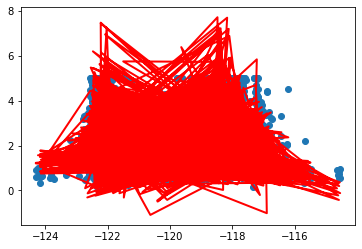

In [30]:
y_pred = lr.predict(X_test)

fig, ax = plt.subplots()
col = 'Longitude'
ax.plot(X_test[col], y_pred, color='red', linewidth=2)
ax.scatter(X_test[col], y_test)
plt.show()

#7) Оценивать полученную модель с помощью MSE, MAE, R2.

In [31]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 0.5442926093731721
Mean Squared Error: 0.5597357262879421
R2 score: 0.5882730401141982


Модель не очень зорошо предсказывает значения 

#8) Сделать письменный вывод получившихся результатов (хорошая или плохая получлась оценка MSE и почему), привести восстановленное линейное уравнение регрессии, сделать вывод какие из признаков оказались наиболее значимыми, какие нет и почему.

Модель не очень хорошо предсказывает значения, судя по метрикам. Это скорее всего связано с тем, что признаки влияют не линейно на ответ
==
* Количество спальных комнат влияет на площадь квартиры => влияет на его цену

* Чем больше зарплата в районе, тем он дороже => влияет на цену квартиры

* Номер квартиры почти никак не влияет на саму квартиру => не влияет на его цену